# Econ 695 Project 
Due: 12/17/2025. Submit this notebook or other scripts you use to produce the tables and figures along with your report. 

Read "ECON695_project.pdf" for details on each expected output. 

In [40]:
import pandas as pd 
import os  # for setting directory 
# os.chdir() # input your personal directory where the dataset is saved
import statsmodels.formula.api as smf # for OLS regressions
import numpy as np  # to work with arrays (vectors/matrices)
import matplotlib.pyplot as plt # for plots

In [41]:
data = pd.read_csv("projectdata.csv")
print(data.shape)
data.head(2)

(16969, 12)


,y,age,educ,female,exp,yl1,yl2,yl3,yp1,yp2,owage2,owage1
0,2.570021,48,12,0,30,2.620926,2.616735,2.608906,2.784972,2.791555,1.191211,1.122809
1,2.298948,46,12,1,28,2.296236,2.284491,2.275459,2.309241,2.320770,2.397997,2.485690


In [42]:
print(data['female'].value_counts(dropna=False))
print(data['educ'].value_counts(dropna=False))
data.describe()

female
0    10575
1     6394
Name: count, dtype: int64
educ
12    5019
6     4651
9     3859
16    3440
Name: count, dtype: int64


,y,age,educ,female,exp,yl1,yl2,yl3,yp1,yp2,owage2,owage1
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,1.787921,33.558902,10.484118,0.376805,17.074783,1.736934,1.717822,1.696991,1.806854,1.840162,1.692074,1.648420
std,0.645257,5.693736,3.586129,0.484600,6.446165,0.610285,0.600409,0.590419,0.646991,0.650853,0.466264,0.472052
min,0.601944,22.000000,6.000000,0.000000,5.000000,0.603566,0.592804,0.590613,0.637028,0.696327,0.716435,0.718321
25%,1.297586,29.000000,6.000000,0.000000,12.000000,1.276873,1.264874,1.249482,1.315681,1.346496,1.352856,1.299025
50%,1.617799,33.000000,9.000000,0.000000,17.000000,1.576101,1.566374,1.551751,1.635421,1.660561,1.561470,1.550452
75%,2.194695,37.000000,12.000000,1.000000,22.000000,2.120593,2.095272,2.058599,2.216467,2.252076,1.957534,1.889397
max,4.343445,52.000000,16.000000,1.000000,30.000000,4.237082,4.300920,4.315834,4.322492,4.399618,3.804267,3.808492


# Section 1. Overview: Female vs. Male Workers
## Summary Statistics (Table 1)
A suggested format for **Table 1** is to have 4 columns:
- column 1 = characteristics for all workers
- column 2 = characteristics for female workers
- column 3 = characteristics for male workers
- column 4 = test statistic comparing females and males (eg t-test)

See the project.pdf for the list of characteristics. 
Hint: to convert a dataframe to LaTex table, use `table.to_latex(float_format="%.3f")`. You could also copy-paste the estimates into excel and format it manually. 

In [48]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("projectdata.csv")

# Education category shares
df['educ_6']  = (df['educ'] == 6).astype(int)
df['educ_9']  = (df['educ'] == 9).astype(int)
df['educ_12'] = (df['educ'] == 12).astype(int)
df['educ_16'] = (df['educ'] == 16).astype(int)

# Variables required in Table 1
continuous_vars = ["age", "y", "owage2"]
edu_vars = ["educ_6", "educ_9", "educ_12", "educ_16"]
all_vars = continuous_vars + edu_vars

# --- Compute summary stats ---
table1 = pd.DataFrame(index=all_vars)

table1["All"]    = df[all_vars].mean()
table1["Female"] = df[df.female == 1][all_vars].mean()
table1["Male"]   = df[df.female == 0][all_vars].mean()

# --- t-stats for ALL variables (continuous + dummies) ---
t_stats = {
    v: stats.ttest_ind(
            df.loc[df.female == 1, v],
            df.loc[df.female == 0, v],
            equal_var=False,
            nan_policy='omit'
        )[0]
    for v in all_vars
}

table1["t_stat"] = table1.index.map(lambda x: t_stats.get(x, np.nan))

# Rename rows for report-readability
table1.index = [
    "Age (mean)",
    "Log Wage y (mean)",
    "Coworker Wage owage2 (mean)",
    "Educ = 6 yrs (fraction)",
    "Educ = 9 yrs (fraction)",
    "Educ = 12 yrs (fraction)",
    "Educ = 16 yrs (fraction)"
]

table1

,All,Female,Male,t_stat
Age (mean),33.558902,33.534407,33.573712,-0.435839
Log Wage y (mean),1.787921,1.658045,1.866448,-20.816260
Coworker Wage owage2 (mean),1.692074,1.637794,1.724893,-11.676093
Educ = 6 yrs (fraction),0.274088,0.248671,0.289456,-5.845916
Educ = 9 yrs (fraction),0.227415,0.194870,0.247092,-8.045046
Educ = 12 yrs (fraction),0.295775,0.328589,0.275934,7.205363
Educ = 16 yrs (fraction),0.202723,0.227870,0.187518,6.231668


## Distribution of Wages (Figure 1)
- Figure 1: histogram of log hourly wages for men and women in one figure. 
- Bonus (Figure 1b): Develop some interesting ways to illustrate the fact that women's wages are lower than men's.

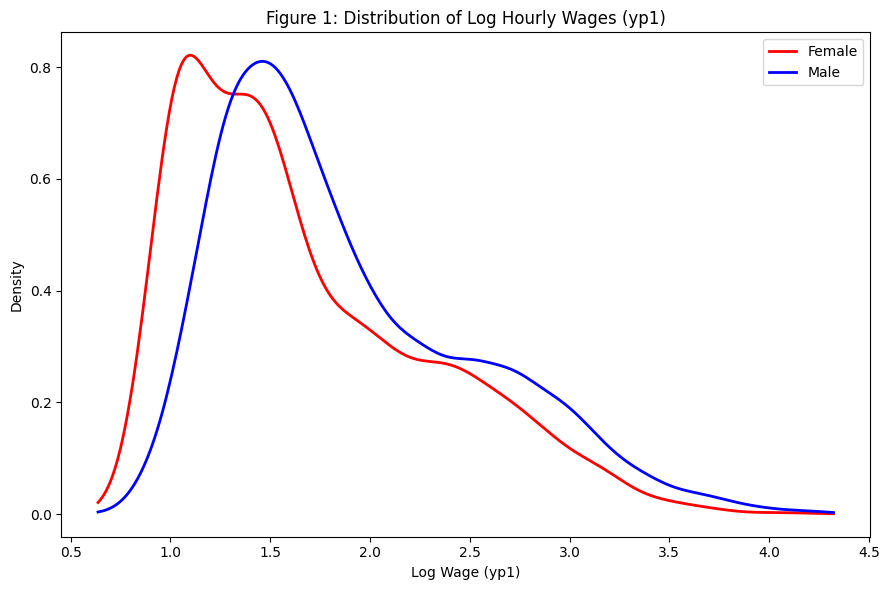

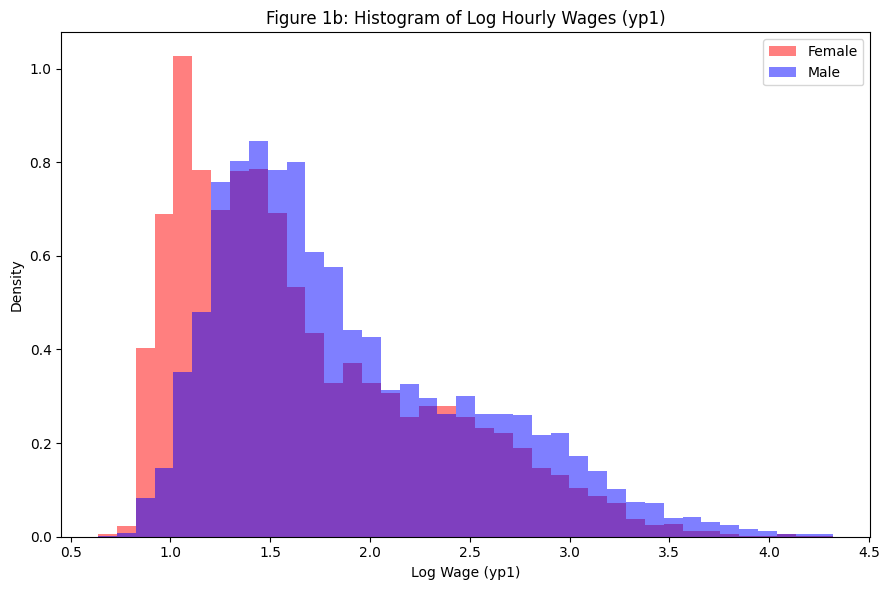

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Extract male and female wages (yp1 is period 1 wage on the second job)
female_w = df.loc[df.female == 1, "yp1"]
male_w   = df.loc[df.female == 0, "yp1"]

# --- Compute KDE for smooth density curves ---
x_grid = np.linspace(min(df["yp1"]), max(df["yp1"]), 300)

kde_female = gaussian_kde(female_w)
kde_male   = gaussian_kde(male_w)

density_female = kde_female(x_grid)
density_male   = kde_male(x_grid)

# --- FIGURE 1A: KDE curves ---
plt.figure(figsize=(9,6))
plt.plot(x_grid, density_female, label="Female", linewidth=2, color="red")
plt.plot(x_grid, density_male, label="Male", linewidth=2, color="blue")

plt.title("Figure 1: Distribution of Log Hourly Wages (yp1)")
plt.xlabel("Log Wage (yp1)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# --- FIGURE 1B (BONUS): Overlaid Histograms ---
plt.figure(figsize=(9,6))

bins = np.linspace(min(df["yp1"]), max(df["yp1"]), 40)

plt.hist(female_w, bins=bins, alpha=0.5, density=True, label="Female", color="red")
plt.hist(male_w, bins=bins, alpha=0.5, density=True, label="Male", color="blue")

plt.title("Figure 1b: Histogram of Log Hourly Wages (yp1)")
plt.xlabel("Log Wage (yp1)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


# Section 2. Gender Wage Gaps
## 2.1 Wage Regressions and Oaxaca Decomposition (Table 2)
In Table 2, you will fit a series of standard wage models. The first set of columns are estimated using the pooled data for women and men. The second set are estimated separately by gender, based on which you can conduct an Oaxaca decomposition. 

In [45]:
# sample code for generating a LaTex Table for regressions 
'''
from statsmodels.iolib.summary2 import summary_col
summary = summary_col(
    results=[model0, model1],
    float_format='%0.3f', stars=False,
    model_names=['(1)', '(2)'],
    info_dict={
        'N': lambda x: f"{int(x.nobs)}", 'Adj R2': lambda x: f"{x.rsquared_adj:.3f}"
    }
)
summary.as_latex()

'''
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

df = data.copy()

# Experience polynomial terms
df["exp2"] = df["exp"]**2
df["exp3"] = df["exp"]**3

# Model 0: y ~ female
model0 = smf.ols("y ~ female", data=df).fit()

# Model 1: y ~ female + education + experience cubic
model1 = smf.ols("y ~ female + C(educ) + exp + exp2 + exp3", data=df).fit()

# Display LaTeX-style combined table
table2_pooled = summary_col(
    results=[model0, model1],
    float_format='%0.3f',
    stars=False,
    model_names=['(1)', '(2)'],
    info_dict={
        'N': lambda x: f"{int(x.nobs)}",
        'Adj R2': lambda x: f"{x.rsquared_adj:.3f}"
    }
)

table2_pooled

male = df[df.female == 0]
female_df = df[df.female == 1]

model_m = smf.ols("y ~ C(educ) + exp + exp2 + exp3", data=male).fit()
model_f = smf.ols("y ~ C(educ) + exp + exp2 + exp3", data=female_df).fit()

table2_gender = summary_col(
    results=[model_m, model_f],
    float_format='%0.3f',
    stars=False,
    model_names=['Male', 'Female'],
    info_dict={
        'N': lambda x: f"{int(x.nobs)}",
        'Adj R2': lambda x: f"{x.rsquared_adj:.3f}"
    }
)

table2_gender

import patsy

# Build design matrices exactly as in model_m and model_f
formula = "y ~ C(educ) + exp + exp2 + exp3"

y_m, X_m = patsy.dmatrices(formula, male, return_type='dataframe')
y_f, X_f = patsy.dmatrices(formula, female_df, return_type='dataframe')

# Drop intercept for decomposition
X_m_noi = X_m.drop(columns="Intercept")
X_f_noi = X_f.drop(columns="Intercept")

# Compute means of covariates
Xm = X_m_noi.mean()
Xf = X_f_noi.mean()

# Extract coefficients (drop intercept)
bm = model_m.params.drop("Intercept")
bf = model_f.params.drop("Intercept")

# Align indices
bm = bm.reindex(Xm.index)
bf = bf.reindex(Xm.index)

# Oaxaca components
explained = float((Xm - Xf) @ bf)
unexplained = float(Xm @ (bm - bf))
total_gap = explained + unexplained

# Output table
oaxaca_results = pd.DataFrame({
    "Explained": [explained],
    "Unexplained": [unexplained],
    "Total Gap": [total_gap]
})

oaxaca_results



,Explained,Unexplained,Total Gap
0,-0.062301,0.107111,0.04481


## 2.2 Gender Difference in Experience Profiles
- Figure 2: Plot the relationship between wages and experience for men and women who have one level of education (e.g., education=12), and show the fit of your regression models. 
- Bonus (Figure 2 continued): Consider plotting “Figure 2” for each of the 4 education groups. Within each education group, how much of the gender gap can be explained by differences in experience profile?

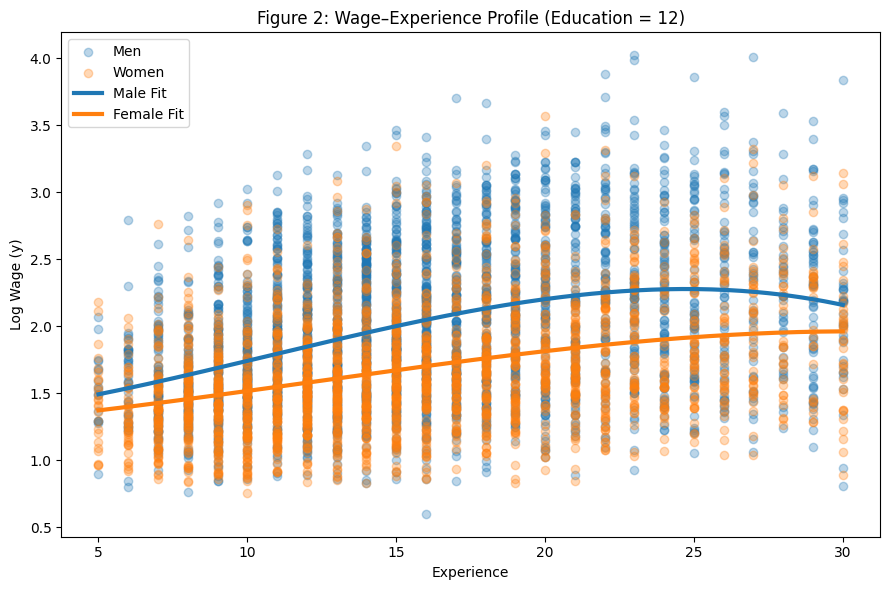

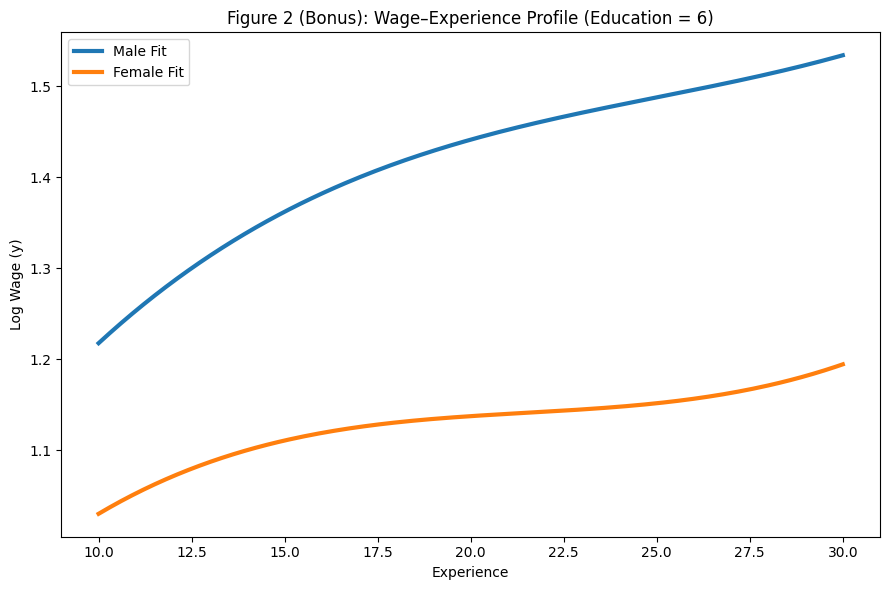

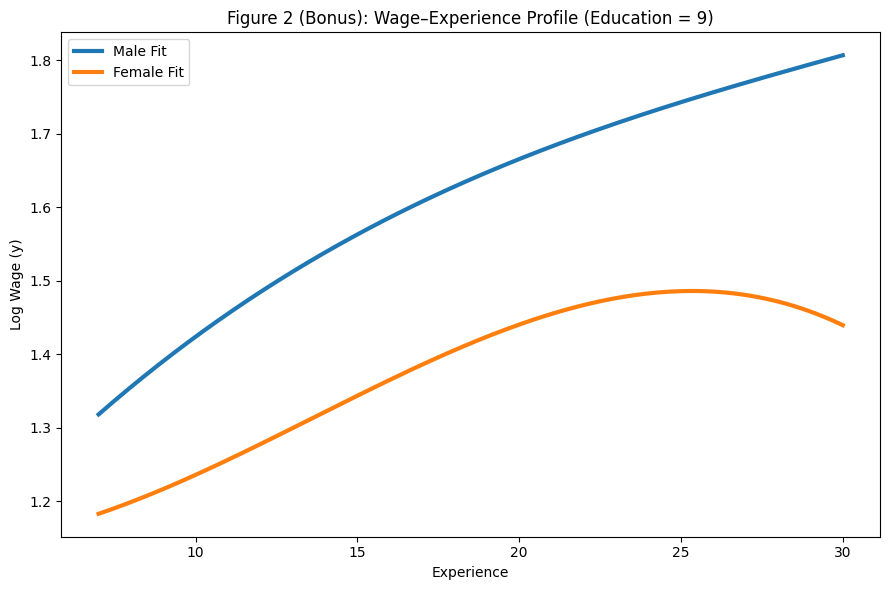

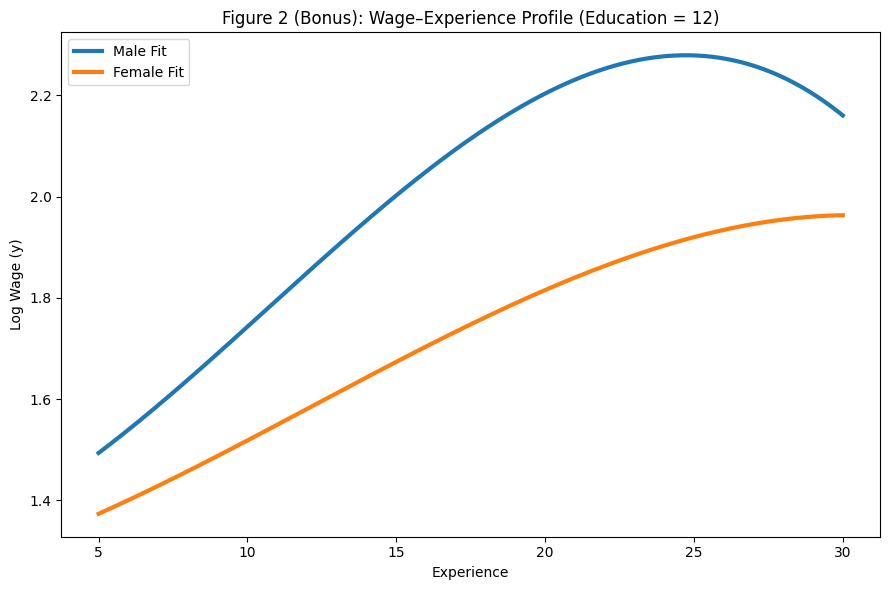

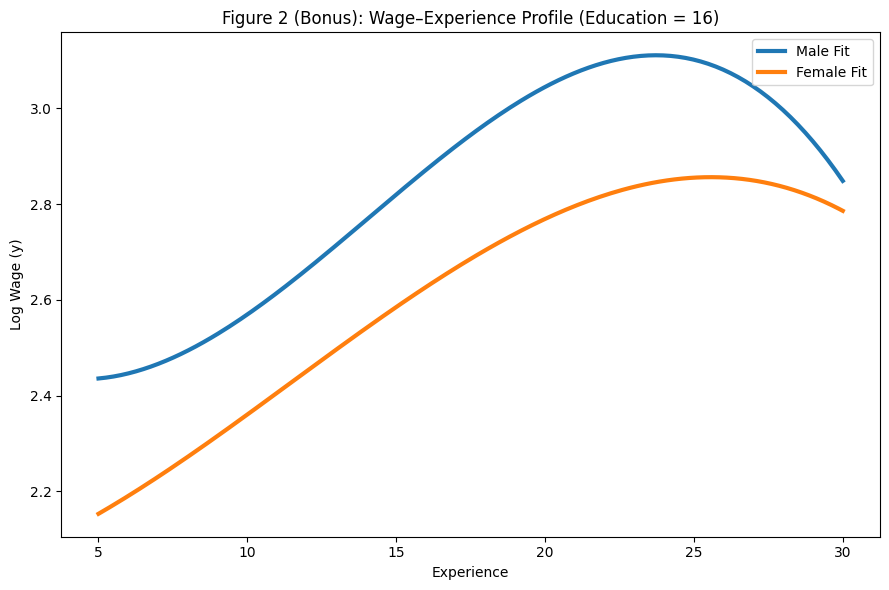

In [46]:
# Choose education group
edu_group = 12
sub = df[df.educ == edu_group]

# Fit by gender
fit_m = smf.ols("y ~ exp + exp2 + exp3", data=sub[sub.female == 0]).fit()
fit_f = smf.ols("y ~ exp + exp2 + exp3", data=sub[sub.female == 1]).fit()

# Range of experience for plotting
xp = np.linspace(sub.exp.min(), sub.exp.max(), 200)
Xp = pd.DataFrame({"exp": xp, "exp2": xp**2, "exp3": xp**3})

# Plot raw data + fitted curves
plt.figure(figsize=(9,6))
plt.scatter(sub[sub.female==0].exp, sub[sub.female==0].y, alpha=0.3, label="Men")
plt.scatter(sub[sub.female==1].exp, sub[sub.female==1].y, alpha=0.3, label="Women")

plt.plot(xp, fit_m.predict(Xp), linewidth=3, label="Male Fit")
plt.plot(xp, fit_f.predict(Xp), linewidth=3, label="Female Fit")

plt.title(f"Figure 2: Wage–Experience Profile (Education = {edu_group})")
plt.xlabel("Experience")
plt.ylabel("Log Wage (y)")
plt.legend()
plt.tight_layout()
plt.show()

for e in [6, 9, 12, 16]:
    sub = df[df.educ == e]
    if len(sub) < 50:
        continue

    fit_m = smf.ols("y ~ exp + exp2 + exp3", data=sub[sub.female == 0]).fit()
    fit_f = smf.ols("y ~ exp + exp2 + exp3", data=sub[sub.female == 1]).fit()

    xp = np.linspace(sub.exp.min(), sub.exp.max(), 200)
    Xp = pd.DataFrame({"exp": xp, "exp2": xp**2, "exp3": xp**3})

    plt.figure(figsize=(9,6))
    plt.plot(xp, fit_m.predict(Xp), linewidth=3, label="Male Fit")
    plt.plot(xp, fit_f.predict(Xp), linewidth=3, label="Female Fit")
    plt.title(f"Figure 2 (Bonus): Wage–Experience Profile (Education = {e})")
    plt.xlabel("Experience")
    plt.ylabel("Log Wage (y)")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Section 3. Gender Wage Gaps Conditional on Coworker Wages

**Table 3** will report 5 models. 

The first set of models are estimated in the pooled data for men and women: 
- including only a constant, a female dummy, and owage2
- including a constant, education, a cubic in experience, a female dummy, and owage2
- including a constant, education, a cubic in experience, a female dummy, owage2, and the interaction of owage2 with the female dummy.

Then, fit separate models for men and women that include a constant, education, and a cubic in experience and owage2. Use these models to perform a new decomposition that accounts for the effect of higher-wage coworkers.

# Section 4. Event Study - Wage Changes around Moves

- **Figure 3**: Conduct 9 separate event studies, plotting mean wages in period -3, -2, -1, 0, 1, 2 for people who start in each tercile of `owage1` and go to each tercile of `owage2`.  

- **Table 4**: Model the change in wages from -1 to 0 (y - yl1) as a function of the change in the mean log wage of co-workers (owage2 - owage1).

- **Bonus (Table 4b)**: Apply shrinkage methods to first-differenced models that control for interactions between (owage2 - owage1) and experience dummies. 


## Figure 3
Hint: get the terciles of owage1, owage2 via `qcut`. 
Reshape the data to a panel data at (person, l) level where $l=-3,-2,-1,0,1,2$ -- years relative to the move to the 2nd job. There are multiple ways to reshape the data from wide to long. For example, you can set the index of a dataframe first and then `stack`.   

## Table 4:

## Bonus: Shrinkage


In [47]:
# For Ridge/Lasso: 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

# Suppose you have defined a dataframe/matrix X with regressors, and y = change in log wage. Try the following: 
'''
fd_Ridge =RidgeCV(fit_intercept=True,cv=5).fit(X, y) 
# extract coefficients: 
[fd_Ridge.intercept_.item()] + fd_Ridge.coef_.tolist()
# For Lasso: 
fd_Lasso =LassoCV(cv=5).fit(X, y)
[fd_Lasso.intercept_.item()] + fd_Lasso.coef_.tolist()
'''

'\nfd_Ridge =RidgeCV(fit_intercept=True,cv=5).fit(X, y) \n# extract coefficients: \n[fd_Ridge.intercept_.item()] + fd_Ridge.coef_.tolist()\n# For Lasso: \nfd_Lasso =LassoCV(cv=5).fit(X, y)\n[fd_Lasso.intercept_.item()] + fd_Lasso.coef_.tolist()\n'